In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Fake_News_Detection/AINoLoPs

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Fake_News_Detection/AINoLoPs


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from transformers import AutoTokenizer, TFAutoModel
from transformers import TFBertModel

# Load AraBert tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")

# Load AraBert model
arabert_model = TFBertModel.from_pretrained("aubmindlab/bert-base-arabertv02")

Some layers from the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at aubmindlab/bert-base-arabertv02.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [4]:
from models import model_without_ft , model_with_ft
from keras.utils.vis_utils import plot_model  # Import plot_model function

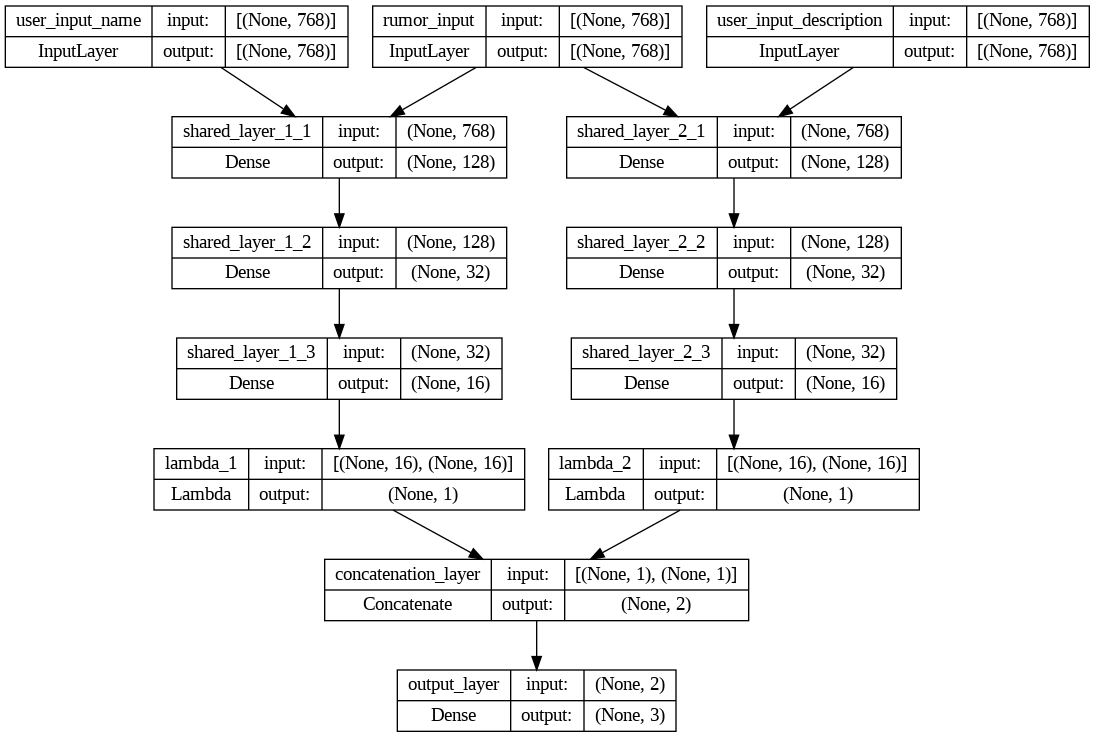

In [5]:
model1 = model_without_ft()
plot_model(model1, show_shapes=True, show_layer_names=True)

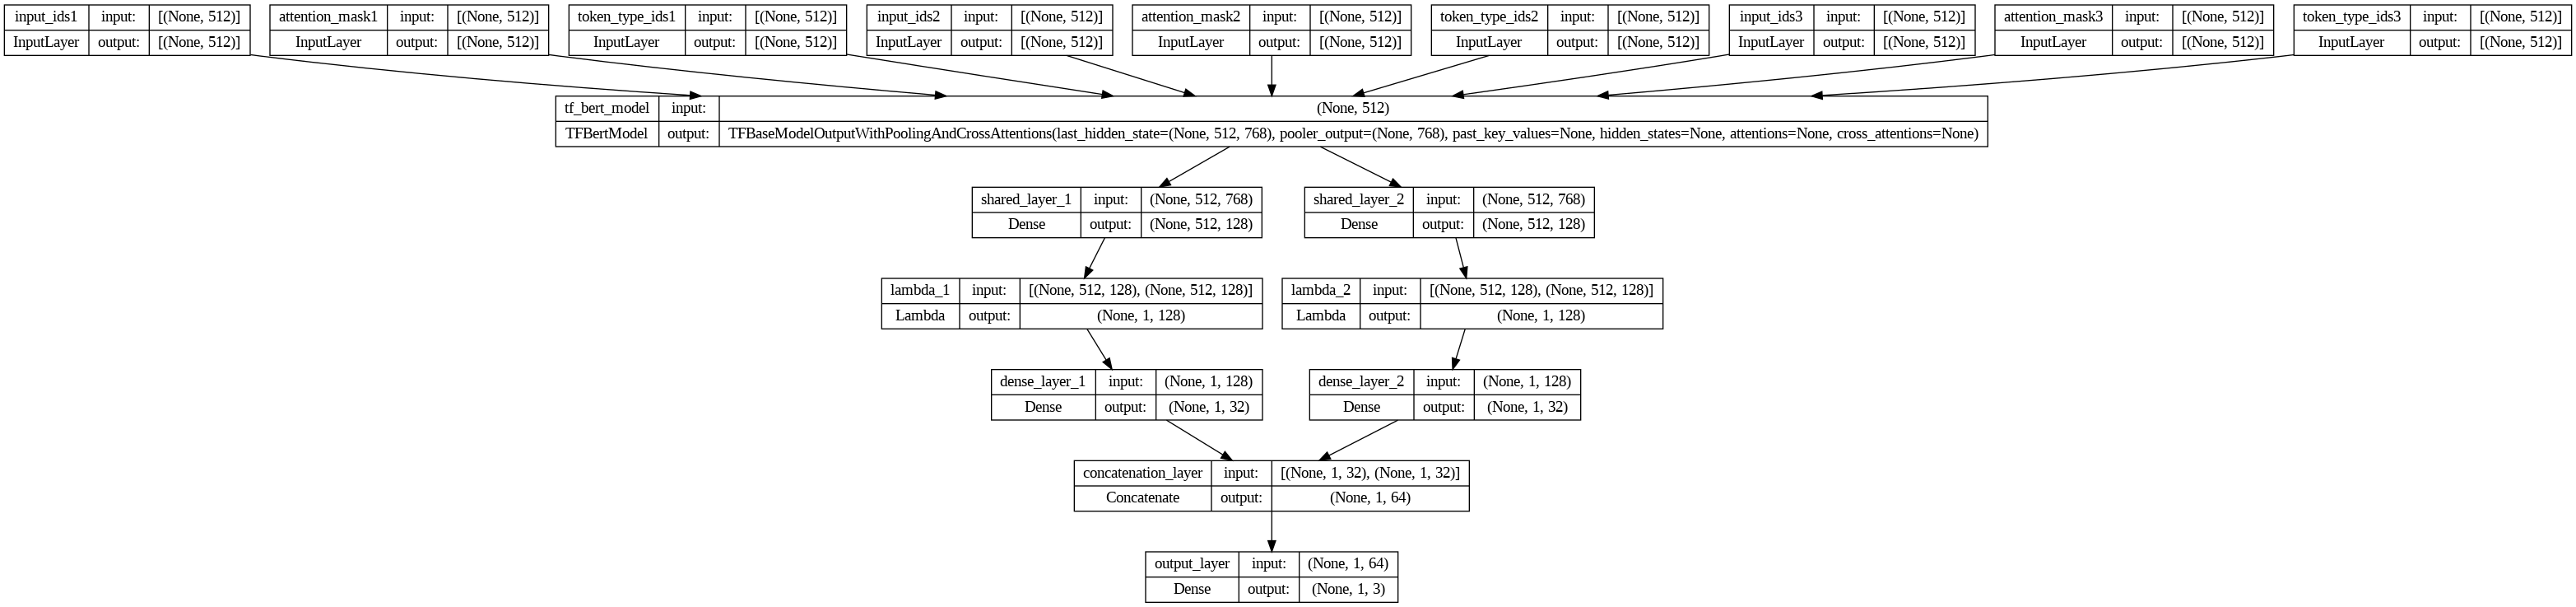

In [6]:
model2 = model_with_ft(arabert_model)
plot_model(model2, show_shapes=True, show_layer_names=True)

**How to get a layer by its name:**

In [7]:
shared_layer_1_1 = model1.get_layer('shared_layer_1_1')
shared_layer_2_2 = model1.get_layer('shared_layer_2_2')
concatenation_layer = model1.get_layer('concatenation_layer')
concatenation_layer

**How to extract a sub-model from the whole model:**

In [8]:
from keras.models import Model

# Get the index of the layer you want to extract up to (shared_layer_2_2 in this case)
index = model1.layers.index(concatenation_layer)

# Slice the model layers list to extract the desired part of the model
extracted_model = Model(inputs=model1.input, outputs=model1.layers[index].output)

**How to get the names of included layers of a model:**

In [9]:
all_layers = model1.layers
# Extract the names of the layers
layer_names = [layer.name for layer in all_layers]
layer_names

['rumor_input',
 'user_input_name',
 'user_input_description',
 'shared_layer_1_1',
 'shared_layer_2_1',
 'shared_layer_1_2',
 'shared_layer_2_2',
 'shared_layer_1_3',
 'shared_layer_2_3',
 'lambda_1',
 'lambda_2',
 'concatenation_layer',
 'output_layer']

**How to get the weights of a model:**

In [19]:
weights = model1.get_weights()


# Get layers of the model
layers = model1.layers

# Loop through the list of layers and their corresponding weights
for i, weight in enumerate(weights):
    # Get the name and shape of the weight array for the current layer
    weight_shape = weight.shape
    print(f"Weight Shape: {weight_shape}")

Weight Shape: (768, 128)
Weight Shape: (128,)
Weight Shape: (768, 128)
Weight Shape: (128,)
Weight Shape: (128, 32)
Weight Shape: (32,)
Weight Shape: (128, 32)
Weight Shape: (32,)
Weight Shape: (32, 16)
Weight Shape: (16,)
Weight Shape: (32, 16)
Weight Shape: (16,)
Weight Shape: (2, 3)
Weight Shape: (3,)
